In [2]:
import os, sys, ast
from PIL import Image, ImageDraw, ImageFont
import numpy as np
from os import environ

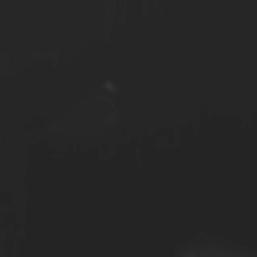

In [9]:
# load image
path = "/media/Gui2/thermix/suenos_dorados_3_frames_no_movement/14_tim/3/Users_golden5s_unkown_2016-06-25_10%3A14%3A07.000000_1/0_2.png"
image = Image.open(path)
image

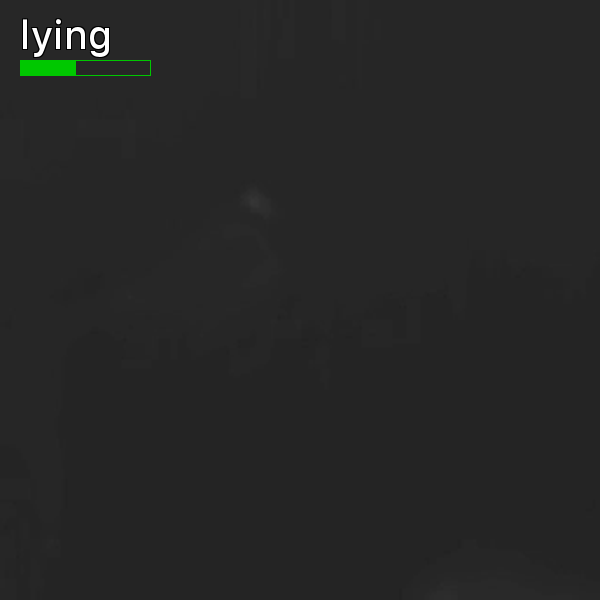

In [10]:
image = image.resize((600, 600), Image.ANTIALIAS)

s = 0.5*100
width = 1.5*s
max_width = 1.5*100

draw = ImageDraw.Draw(image)
label = "lying"

#draw label name
fontPath = "./SF-UI-Text-Medium.otf"
fontSize = 40
font  =  ImageFont.truetype ( fontPath, fontSize )
x = 20
y = 10
draw.text((x-1, y-1), text=label, font=font, fill="rgb(0,0,0)")
draw.text((x+1, y-1), text=label, font=font, fill="rgb(0,0,0)")
draw.text((x-1, y+1), text=label, font=font, fill="rgb(0,0,0)")
draw.text((x+1, y+1), text=label, font=font, fill="rgb(0,0,0)")
draw.text((x,y), text=label, fill="rgb(255,255,255)", font=font)

#draw score label
#color_fill = ("rgb(0,200,0)" if score > 50 else "rgb(200,0,0)")d
color_fill = "rgb(0,200,0)"
draw.rectangle([(20,60),(max_width,75)], fill=None, outline=color_fill)
draw.rectangle([(20,60),(width,75)], fill=color_fill, outline=color_fill)
del draw
image

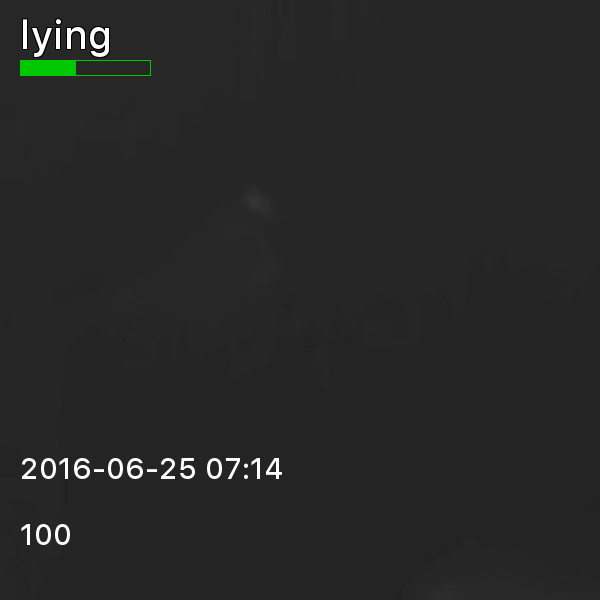

In [11]:
from operator import itemgetter
from datetime import datetime, timedelta

# name_of_video = "Users_thermaldata_unkown_2016-06-20_18%3A46%3A22.000000_2"
name_of_video = os.path.basename(os.path.dirname(path))

# str_date_of_video = 2016-06-20T18%3A46%3A22
str_date_of_video = "T".join(os.path.splitext(name_of_video)[0].split("_")[-2:])

# date_of_video = datetime(2016-06-20 18:46:22)
date_of_video = datetime.strptime(str_date_of_video,"%Y-%m-%dT%H%%3A%M%%3A%S")

#convert to argentinian date
date_of_video -= timedelta(hours=3)

font = ImageFont.truetype("SF-UI-Text-Medium.otf", 30)
draw = ImageDraw.Draw(image)
draw.text((x, image.size[0]* 3/4),date_of_video.strftime("%Y-%m-%d %H:%M")+"\n\n100",(255,255,255),font=font)

del draw
image

In [87]:
for i in range(0,80):
    image.save("/media/Gui2/thermix/ARTraining/example_vid/%d.png"%i)

In [88]:
import requests, os, sys, getopt, ast, PIL, av, numpy
from PIL import Image, ImageFont, ImageDraw
from operator import itemgetter
from datetime import datetime, timedelta
from os import listdir
from os.path import isfile, join

In [89]:
content = [f for f in listdir("/media/Gui2/thermix/ARTraining/example_vid") if isfile(join("/media/Gui2/thermix/ARTraining/example_vid", f))]

# make video for class
output_path = os.path.join("/media/Gui2/thermix/ARTraining/example_vid/example.mov")

output = av.open(output_path, 'w')
#stream = output.add_stream("mpeg4", "%d"%fps)
stream = output.add_stream("wmv1:mbd=2:trell", "60")

img = Image.open(content[0])

stream.height = img.size[0]
stream.width = img.size[1]

for path in content:
    img = Image.open(path)

    if img.mode != "RGB":
        img=img.convert("RGB")

    img_matrix = numpy.asarray(img)#.reshape(img.size[0], img.size[1], 3)
    frame = av.VideoFrame.from_ndarray(img_matrix)
    packet = stream.encode(frame)
    output.mux(packet)

output.close()



ValueError: unknown encoding codec: 'wmv1:mbd=2:trell'

In [156]:
def draw_classification_on_image(path, output_path, score, label, stretch_image=False, add_date=True):
    # open image
    image = Image.open(path)

    if image.mode != "RGB":
        image=image.convert("RGB")

    
    # First of all, we stretch the image if needed
    if stretch_image:
        image = np.asarray(image) 

        r = image[:,:,0]
        eq_1 = hist_stretching(r)  #eq_1,_,_,_ = histeq(r)
        image = Image.fromarray(eq_1, 'L')
    
    # Once stretched, resize it to make it more 'uploadable'
    image = image.resize((600, 600), Image.ANTIALIAS)    
    
    # Once the image was sized up, now we write on top of it. First the date (if needed)
    if add_date:
        # name_of_video = "Users_thermaldata_unkown_2016-06-20_18%3A46%3A22.000000_2"
        name_of_video = os.path.basename(os.path.dirname(path))

        # str_date_of_video = 2016-06-20T18%3A46%3A22
        str_date_of_video = "T".join(os.path.splitext(name_of_video)[0].split("_")[-2:])

        # date_of_video = datetime(2016-06-20 18:46:22)
        date_of_video = datetime.strptime(str_date_of_video,"%Y-%m-%dT%H%%3A%M%%3A%S")

        #convert to argentinian date
        date_of_video -= timedelta(hours=3)

        font = ImageFont.truetype("SF-UI-Text-Medium.otf", 30)
        draw = ImageDraw.Draw(image)
        draw.text((20, image.size[0]* 3/4),date_of_video.strftime("%Y-%m-%d %H:%M"),(255,255,255),font=font)

        del draw

    # Now the frame's label
    draw = ImageDraw.Draw(image)

    # values for green box
    s = score*100
    width = 1.5*s
    max_width = 1.5*100
    
    # draw label name
    fontPath = "./SF-UI-Text-Medium.otf"
    fontSize = 40
    font  =  ImageFont.truetype ( fontPath, fontSize )
    x = 19
    y = 10
    
    '''
    # borde fino
    draw.text((x-1, y), text, font=font, fill="rgb(0,0,0)")
    draw.text((x+1, y), text, font=font, fill="rgb(0,0,0)")
    draw.text((x, y-1), text, font=font, fill="rgb(0,0,0)")
    draw.text((x, y+1), text, font=font, fill="rgb(0,0,0)")
    '''

    # borde grueso
    draw.text((x-1, y-1), text=label, font=font, fill="rgb(0,0,0)")
    draw.text((x+1, y-1), text=label, font=font, fill="rgb(0,0,0)")
    draw.text((x-1, y+1), text=label, font=font, fill="rgb(0,0,0)")
    draw.text((x+1, y+1), text=label, font=font, fill="rgb(0,0,0)")

    # draw label on image
    draw.text((x,y), text=label, fill="rgb(255,255,255)", font=font)

    #draw score label
    color_fill = "rgb(0,200,0)"
    draw.rectangle([(20,65),(20+max_width,70)], fill=None, outline=color_fill)
    draw.rectangle([(20,65),(20+width,70)], fill=color_fill, outline=color_fill)
    del draw

    # Save image to output_path
    image.save(output_path, format='PNG', quality=100)

In [157]:
p = "/media/Gui2/thermix/suenos_dorados_3_frames_no_movement/14_tim/3/Users_golden5s_unkown_2016-06-25_10%3A14%3A07.000000_1/0_2.png"
o = "example.png"
draw_classification_on_image(p, o, 0.5, "standing", stretch_image=False, add_date=True)

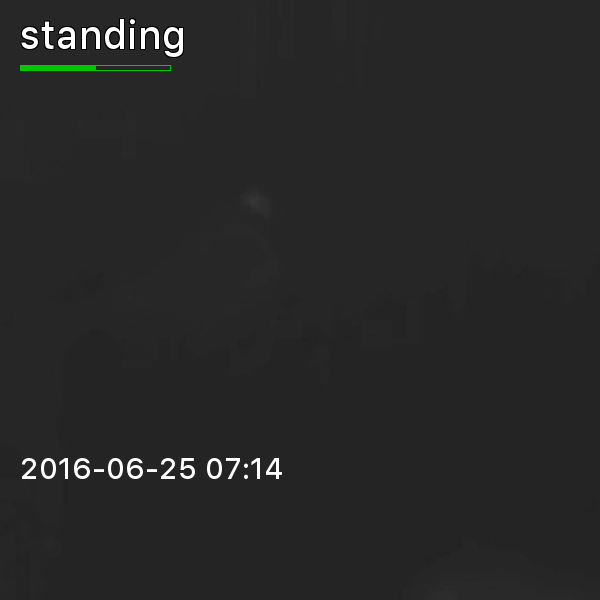

In [158]:
i2 = Image.open(o)
i2